In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Devise

In [2]:
from fastai.conv_learner import *
torch.backends.cudnn.benchmark=True

import fastText as ft

In [3]:
import torchvision.transforms as transforms

In [4]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

tfms = transforms.Compose([
    transforms.RandomSizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    normalize,
])

In [5]:
fname = 'images/waffles/971843.jpg'

In [6]:
PATH = Path('/data/food-101')
TMP_PATH = PATH/'tmp'
TMP_PATH.mkdir(exist_ok=True)

In [7]:
img = Image.open(PATH/fname)

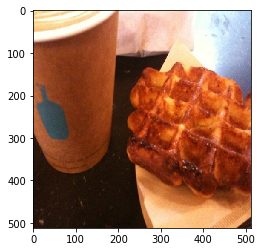

In [11]:
plt.imshow(img)

In [12]:
import fastai

In [13]:
arch=resnet34
ttfms,vtfms = tfms_from_model(arch, 224, transforms_side_on, max_zoom=1.1)
def to_array(x,y): return np.array(x).astype(np.float32)/255,None
def TT(x,y): return torch.from_numpy(x),None

ttfms.tfms = [to_array] + ttfms.tfms# + [TT]

In [14]:
ttfms(img)

array([[[ 0.96785,  0.96421,  0.96502, ...,  2.24891,  2.24891,  2.24891],
        [ 0.9785 ,  0.9944 ,  0.98907, ...,  2.24317,  2.23908,  2.24891],
        [ 0.97824,  0.97529,  0.97648, ...,  2.24891,  2.24869,  2.24891],
        ...,
        [-0.75144, -0.86714, -0.96067, ..., -1.30119, -1.29639, -1.31187],
        [-0.65392, -0.78303, -0.90652, ..., -1.27335, -1.27576, -1.26882],
        [-0.95539, -1.00646, -1.05198, ..., -1.27215, -1.27553, -1.26904]],

       [[ 1.71638,  1.71478,  1.71518, ...,  1.9099 ,  1.89143,  1.85349],
        [ 1.70217,  1.72155,  1.71532, ...,  1.99923,  1.90453,  1.85487],
        [ 1.67606,  1.67971,  1.67864, ...,  1.96195,  1.89924,  1.85116],
        ...,
        [-1.18751, -1.28125, -1.34907, ..., -1.44528, -1.43596, -1.46097],
        [-1.12796, -1.21854, -1.29414, ..., -1.44168, -1.44   , -1.44183],
        [-1.31508, -1.38547, -1.43945, ..., -1.46204, -1.4649 , -1.45775]],

       [[ 2.42496,  2.42334,  2.42356, ...,  1.16553,  1.11424,  1.023

In [19]:
ft_vecs = ft.load_model(str((PATH/'wiki.en.bin')))

In [20]:
# the English Wikipedia (from which these fasttext vectors are based) contains many imported words,
# such as this South Korean delicacy.
ft_vecs.get_word_vector('bibimbap')

array([-0.17312,  0.67789,  0.02758, -0.19625, -0.12882,  0.02245, -0.18145, -0.78455,  0.03599, -0.4044 ,
        0.03361,  0.1978 , -0.10437, -0.50488,  0.32577, -0.21824, -0.48772,  0.24602,  0.30623, -0.15783,
       -0.30381, -0.3505 ,  0.19436,  0.35325, -0.11009,  0.27115, -0.54712, -0.38872,  0.20073, -0.24999,
       -0.05064, -0.33633, -0.45624,  0.19107, -0.04186,  0.34411,  0.11012,  0.10668, -0.01386, -0.32704,
       -0.08347,  0.41185,  0.64833, -0.14697,  0.03427, -0.02415,  0.12514, -0.16299, -0.40224,  0.60419,
       -0.09834,  0.02416,  0.22191,  0.27945, -0.06426,  0.49234, -0.1661 ,  0.07503,  0.32363, -0.22936,
        0.48197,  0.31985,  0.10119, -0.53915, -0.05682, -0.09341,  0.11307,  0.09115,  0.515  ,  0.13764,
       -0.22909, -0.17249,  0.59863,  0.09867, -0.13623,  0.27125,  0.27687,  0.57246, -0.45064,  0.2504 ,
        0.06641,  0.09382,  0.15634, -0.38996, -0.06068, -0.2496 , -0.18251,  0.30635,  0.62988, -0.0858 ,
        0.44684, -0.38676,  0.15667, 

In [30]:
np.corrcoef(ft_vecs.get_word_vector('boat'), ft_vecs.get_word_vector('dinghy'))

array([[1.     , 0.65917],
       [0.65917, 1.     ]])

In [34]:
np.corrcoef(ft_vecs.get_word_vector('ketchup'), ft_vecs.get_word_vector('chilli'))

array([[1.     , 0.61188],
       [0.61188, 1.     ]])

### Map imagenet classes to word vectors

In [35]:
ft_words = ft_vecs.get_words(include_freq=True)
ft_word_dict = {k:v for k,v in zip(*ft_words)}
ft_words = sorted(ft_word_dict.keys(), key=lambda x: ft_word_dict[x])

len(ft_words)

2519370

In [37]:
ft_word_dict['bibimbap']

130

In [38]:
from fastai.io import get_data

In [39]:
CLASSES_FN = PATH/'meta/classes.txt'

In [40]:
WORDS_FN = 'classids.txt'
get_data(f'http://files.fast.ai/data/{WORDS_FN}', PATH/WORDS_FN)

In [41]:
classes_101 = (TMP_PATH/CLASSES_FN).open().readlines()
nclass = len(classes_101); nclass

101

In [42]:
classes_101[:10]

['apple_pie\n',
 'baby_back_ribs\n',
 'baklava\n',
 'beef_carpaccio\n',
 'beef_tartare\n',
 'beet_salad\n',
 'beignets\n',
 'bibimbap\n',
 'bread_pudding\n',
 'breakfast_burrito\n']

In [43]:
classes_101[0]

'apple_pie\n'

In [44]:
classid_lines = (PATH/WORDS_FN).open().readlines()
classid_lines[:5]

['n00001740 entity\n',
 'n00001930 physical_entity\n',
 'n00002137 abstraction\n',
 'n00002452 thing\n',
 'n00002684 object\n']

In [45]:
wordnet = [l.strip().split()[1] for l in classid_lines] + [l.strip() for l in classes_101]
classes_all = list(set(wordnet))
len(classes_all),len(classes_101)

(67962, 101)

In [46]:
wordnet[-1000]

'compassionate_leave'

In [47]:
lc_vec_d = {w.lower(): ft_vecs.get_word_vector(w) for w in classes_all}
lc_vec_d_1k = {w.lower().strip(): ft_vecs.get_word_vector(w) for w in classes_101}

In [48]:
word_wv = [(w, lc_vec_d[w.lower()]) for w in classes_all
          if w.lower() in lc_vec_d]
word2wv = dict(word_wv)

# Use a csv dataloader and take advantage of the ease-of-use

In [49]:
pickle.dump(lc_vec_d, (TMP_PATH/'lc_vec_d.pkl').open('wb'))
pickle.dump(lc_vec_d_1k, (TMP_PATH/'lc_vec_d_1k.pkl').open('wb'))

In [43]:
lc_vec_d = pickle.load((TMP_PATH/'lc_vec_d.pkl').open('rb'))
lc_vec_d_1k = pickle.load((TMP_PATH/'lc_vec_d_1k.pkl').open('rb'))

In [50]:
images = []
img_vecs = []

for dire in (PATH/'images').iterdir():
    if dire.name not in lc_vec_d: continue
    vec = lc_vec_d[dire.name]
    for f in dire.iterdir():
        images.append(str(f.relative_to(PATH)))
        img_vecs.append(vec)

In [51]:
images[0]

'images/beignets/2885220.jpg'

In [52]:
img_vecs[0]

array([-0.03161,  0.09492, -0.11248, -0.27354, -0.21677,  0.4291 ,  0.1963 , -0.25837,  0.52544, -0.00154,
        0.21663,  0.11508, -0.15019, -0.19484, -0.17093, -0.29794,  0.00695, -0.0194 ,  0.21036, -0.12465,
       -0.36858, -0.05815,  0.39113,  0.455  , -0.10581,  0.21249,  0.02394, -0.44104,  0.20809,  0.04945,
       -0.47479, -0.27543, -0.60547, -0.11644, -0.01707,  0.18735, -0.20743, -0.18493, -0.29754,  0.09811,
       -0.11574, -0.03182,  0.10966, -0.00404, -0.12068,  0.14162, -0.15134, -0.34659, -0.11288,  0.65519,
       -0.27983, -0.35147, -0.2659 , -0.1281 , -0.12126, -0.01779, -0.17949, -0.02894,  0.02253,  0.14515,
        0.49039, -0.03   , -0.04617, -0.311  , -0.13614, -0.20199,  0.1889 ,  0.06929,  0.27933,  0.19121,
        0.00664,  0.2085 ,  0.40239, -0.08814, -0.15157,  0.70003,  0.27375,  0.12205, -0.04917, -0.31967,
        0.20337,  0.11432,  0.03515, -0.18803, -0.25561, -0.09772,  0.21651,  0.3304 ,  0.37034,  0.33194,
        0.21715,  0.04101,  0.02677, 

In [53]:
img_vecs = np.stack(img_vecs)
img_vecs.shape

(101000, 300)

In [54]:
pickle.dump(images, (TMP_PATH/'images.pkl').open('wb'))
pickle.dump(img_vecs, (TMP_PATH/'img_vecs.pkl').open('wb'))

In [ ]:
images = pickle.load((TMP_PATH/'images.pkl').open('rb'))
img_vecs = pickle.load((TMP_PATH/'img_vecs.pkl').open('rb'))

In [55]:
arch = resnet34

In [56]:
n = len(images); n

101000

In [59]:
val_idxs = get_cv_idxs(n, seed=27)

In [60]:
val_idxs

array([20048, 62177, 56946, ..., 45000, 44824, 96268])

In [61]:
tfms = tfms_from_model(arch, 224, transforms_side_on, max_zoom=1.1)
md = ImageClassifierData.from_names_and_array(PATH, images, img_vecs, val_idxs=val_idxs,
        classes=None, tfms=tfms, continuous=True, bs=256)

In [62]:
x,y = next(iter(md.val_dl))

In [64]:
models = ConvnetBuilder(arch, md.c, is_multi=False, is_reg=True, xtra_fc=[1024], ps=[0.5,0.5])

learn = ConvLearner(md, models, precompute=True)
learn.opt_fn = partial(optim.Adam, betas=(0.9,0.95))

In [65]:
def cos_loss(inp,targ): return 1 - F.cosine_similarity(inp,targ).mean()
learn.crit = cos_loss

In [66]:
learn.lr_find(start_lr=1e-14, end_lr=1e15, wds=0.02)

 93%|█████████▎| 294/316 [00:40<00:02,  7.35it/s, loss=nan]  

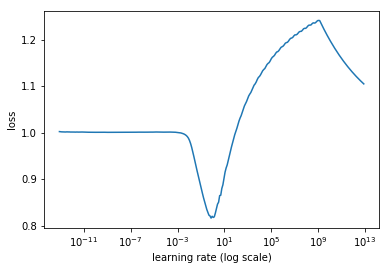

In [67]:
learn.sched.plot(10, 1)

In [68]:
lr = 1e-2
wd = 1e-7

In [69]:
learn.precompute=True

In [70]:
learn.fit(lr, 1, cycle_len=20, wds=wd, use_clr_beta=(10,20, 0.95, 0.85))

 43%|████▎     | 136/316 [00:07<00:10, 17.38it/s, loss=0.383]
epoch      trn_loss   val_loss                               
    0      0.285495   0.259447  
    1      0.247486   0.218731                               
    2      0.233475   0.203851                               
    3      0.229529   0.199069                               
    4      0.226356   0.196048                               
    5      0.223297   0.192082                               
    6      0.22051    0.192349                               
    7      0.221322   0.18906                                
    8      0.218742   0.187842                               
    9      0.214297   0.185845                               
    10     0.209901   0.185604                               
    11     0.20772    0.180261                               
    12     0.204038   0.178309                               
    13     0.200772   0.178253                               
    14     0.198641   0.17676        

[array([0.17464])]

In [71]:
learn.save('p17_loss_1cycle_p001lr')

In [71]:
learn.load('p17_loss_1cycle_p001lr')

In [72]:
learn.bn_freeze(True)

In [73]:
learn.fit(lr, 1, cycle_len=20, wds=wd, use_clr=(10,20))

epoch      trn_loss   val_loss                               
    0      0.190927   0.173675  
    1      0.195457   0.175798                               
    2      0.19453    0.175052                               
    3      0.192118   0.176636                               
    4      0.191071   0.174743                               
    5      0.189897   0.174653                               
    6      0.186789   0.17064                                
    7      0.185151   0.172911                               
    8      0.18549    0.169044                               
    9      0.182516   0.170845                               
    10     0.182815   0.169598                               
    11     0.181223   0.169691                               
    12     0.17975    0.168432                               
    13     0.178964   0.167944                               
    14     0.17846    0.169226                               
    15     0.176993   0.167805       

[array([0.16642])]

In [74]:
learn.save('p16_loss_1cycle_p001lr')

In [75]:
lrs = np.array([lr/1000,lr/100,lr])

In [76]:
learn.precompute=False
learn.freeze_to(1)

In [77]:
learn.lr_find(start_lr=1e-4, end_lr=1e15)

 72%|███████▏  | 229/316 [09:34<03:38,  2.51s/it, loss=nan]  

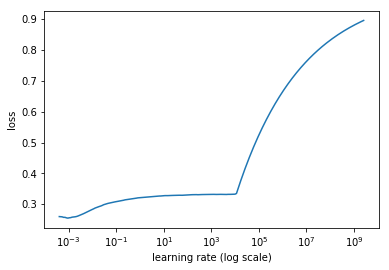

In [78]:
learn.sched.plot()

In [79]:
learn.save('pre0')

In [ ]:
learn.load('pre0')

## Image search

### Search imagenet classes

In [80]:
syns, wvs = list(lc_vec_d_1k.keys()), list(lc_vec_d_1k.values())
wvs = np.array(wvs)

In [81]:
syns[0]

'apple_pie'

In [82]:
%time pred_wv = learn.predict()

CPU times: user 5min 7s, sys: 2.21 s, total: 5min 10s
Wall time: 1min 21s


In [84]:
start=600

In [85]:
denorm = md.val_ds.denorm

def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.axis('off')
    return ax

def show_imgs(ims, cols, figsize=None):
    fig,axes = plt.subplots(len(ims)//cols, cols, figsize=figsize)
    for i,ax in enumerate(axes.flat): show_img(ims[i], ax=ax)
    plt.tight_layout()

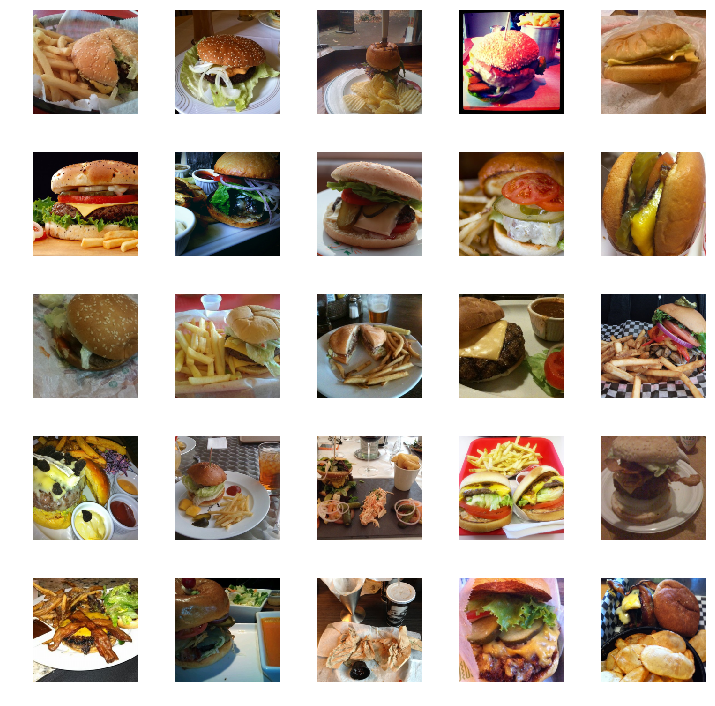

In [86]:
show_imgs(denorm(md.val_ds[start:start+25][0]), 5, (10,10))

In [87]:
import nmslib

def create_index(a):
    index = nmslib.init(space='angulardist')
    index.addDataPointBatch(a)
    index.createIndex()
    return index

def get_knns(index, vecs):
     return zip(*index.knnQueryBatch(vecs, k=10, num_threads=4))

def get_knn(index, vec): return index.knnQuery(vec, k=10)

In [88]:
nn_wvs = create_index(wvs)

In [102]:
idxs,dists = get_knns(nn_wvs, pred_wv)

In [104]:
[[syns[id] for id in ids[:3]] for ids in idxs[start:start+10]]

[['grilled_cheese_sandwich', 'pulled_pork_sandwich', 'hamburger'],
 ['hamburger', 'pizza', 'steak'],
 ['grilled_cheese_sandwich', 'pulled_pork_sandwich', 'garlic_bread'],
 ['hamburger', 'grilled_cheese_sandwich', 'bread_pudding'],
 ['hamburger', 'grilled_cheese_sandwich', 'pulled_pork_sandwich'],
 ['hamburger', 'chicken_quesadilla', 'bread_pudding'],
 ['pulled_pork_sandwich', 'grilled_cheese_sandwich', 'lobster_roll_sandwich'],
 ['hamburger', 'pizza', 'steak'],
 ['hamburger', 'chicken_quesadilla', 'bread_pudding'],
 ['hot_dog', 'grilled_cheese_sandwich', 'garlic_bread']]

### Search all wordnet noun classes

In [105]:
all_syns, all_wvs = list(zip(*word2wv.items()))
all_wvs = np.array(all_wvs)

In [106]:
nn_allwvs = create_index(all_wvs)

In [107]:
idxs,dists = get_knns(nn_allwvs, pred_wv)

In [108]:
[[all_syns[id] for id in ids[:3]] for ids in idxs[start:start+10]]

[['hamburger_bun', 'chicken_sandwich', 'pork_sausage'],
 ['hamburger', 'Limburger', 'Luxemburger'],
 ['grilled_cheese_sandwich', 'pulled_pork_sandwich', 'garlic_bread'],
 ['hamburger_bun', 'hamburger', 'pork_sausage'],
 ['hamburger_bun', 'steak_sauce', 'chicken_sandwich'],
 ['hamburger', 'steak_sauce', 'hamburger_bun'],
 ['pulled_pork_sandwich', 'grilled_cheese_sandwich', 'pork_sausage'],
 ['hamburger', 'Limburger', 'Luxemburger'],
 ['hamburger', 'Limburger', 'hamburger_bun'],
 ['hot_dog', 'hot_sauce', 'grilled_cheese_sandwich']]

### Text -> image search

In [109]:
nn_predwv = create_index(pred_wv)

In [ ]:
# en_vecd = pickle.load(open(TRANS_PATH/'wiki.en.pkl','rb'))

In [110]:
# vec = en_vecd['boat']
vec = ft_vecs.get_word_vector('boat')

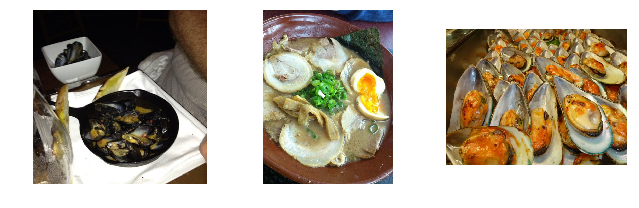

In [111]:
idxs,dists = get_knn(nn_predwv, vec)
show_imgs([open_image(PATH/md.val_ds.fnames[i]) for i in idxs[:3]], 3, figsize=(9,3));

In [124]:
# vec = en_vecd['boat']
vec = ft_vecs.get_word_vector('seafood')

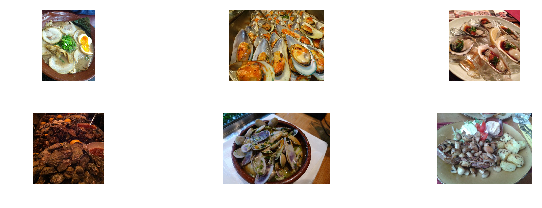

In [125]:
idxs,dists = get_knn(nn_predwv, vec)
show_imgs([open_image(PATH/md.val_ds.fnames[i]) for i in idxs[:6]], 3, figsize=(9,3));

In [128]:
vec = (ft_vecs.get_word_vector('roast') + ft_vecs.get_word_vector('chicken'))/2

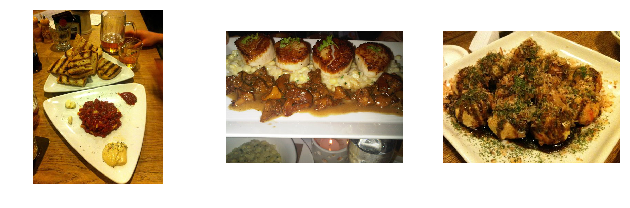

In [129]:
idxs,dists = get_knn(nn_predwv, vec)
show_imgs([open_image(PATH/md.val_ds.fnames[i]) for i in idxs[:3]], 3, figsize=(9,3));

In [136]:
vec = (ft_vecs.get_word_vector('egg') + ft_vecs.get_word_vector('mix'))/2

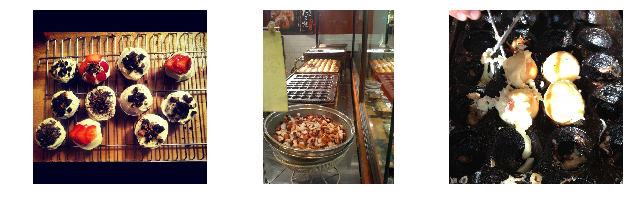

In [137]:
idxs,dists = get_knn(nn_predwv, vec)
show_imgs([open_image(PATH/md.val_ds.fnames[i]) for i in idxs[:3]], 3, figsize=(9,3));

### Image->image

In [138]:
fname = '/data/food-101/Tiramisu_with_blueberries_and_raspberries.jpg'

In [139]:
img = open_image(fname)

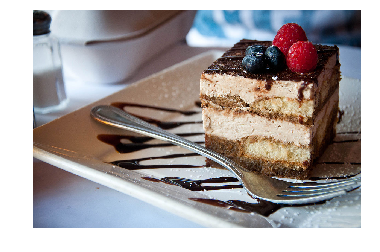

In [140]:
show_img(img); # from https://en.wikipedia.org/wiki/Tiramisu

In [141]:
t_img = md.val_ds.transform(img)
pred = learn.predict_array(t_img[None])

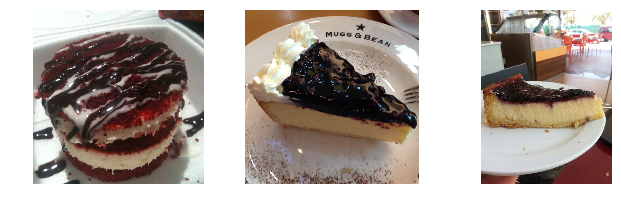

In [142]:
idxs,dists = get_knn(nn_predwv, pred)
show_imgs([open_image(PATH/md.val_ds.fnames[i]) for i in idxs[1:4]], 3, figsize=(9,3));